In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from process_results import Lorenz
# %matplotlib notebook

In [2]:
# Load pkl file
with open('experiment_results_202307121305.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:
mask = np.array(data['sindy_mask'][0])
sindy_coefficients = np.array(data['sindy_coefficients'][0])
sindy_res = mask * sindy_coefficients
print("SINDY Autoencoder Results")
print(sindy_res)
print('\nFirst 10 Rows of SINDY Library')
print(['1','x','y','z','xx','xy','xz','yy','yz','zz'])

SINDY Autoencoder Results
[[ -0.          0.         -6.8474083]
 [  0.        -10.8217325   0.       ]
 [ -0.        -10.938384   -0.       ]
 [ -0.          0.         -2.718542 ]
 [ -0.          0.          0.       ]
 [  0.          0.         -2.746    ]
 [ -0.         -0.          0.       ]
 [ -0.         -0.         -0.2133373]
 [  9.657982    0.          0.       ]
 [  0.         -0.         -0.       ]
 [ -0.          0.          0.       ]
 [ -0.         -0.          0.       ]
 [  0.          0.         -0.       ]
 [ -0.          0.          0.       ]
 [ -0.         -0.          0.       ]
 [ -0.         -0.          0.       ]
 [  0.         -0.         -0.       ]
 [  0.         -0.         -0.       ]
 [  0.         -0.          0.       ]
 [ -0.         -0.         -0.       ]]

First 10 Rows of SINDY Library
['1', 'x', 'y', 'z', 'xx', 'xy', 'xz', 'yy', 'yz', 'zz']


In [25]:
def estimated_f(x,t): # Coefficients taken from the results above
    x1 = x[0]  # x1 = x
    x2 = x[1]  # x2 = y
    x3 = x[2]  # x3 = z
    return np.array([9.65798187*x2*x3,-10.8217325*x1 - 10.9383841*x2, -6.84740 - 2.71854*x3 - 2.746*x1*x2 - .21334*x2**2])

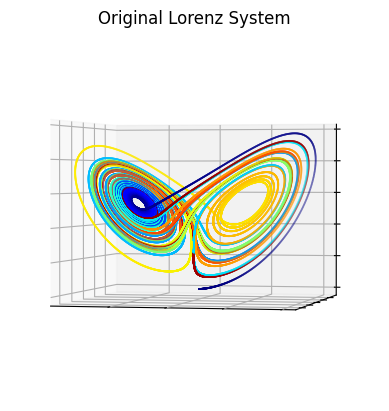

In [26]:
lorenz = Lorenz(dt=0.0005, t_end=50, f=None, sigma=10, rho=28, beta=8 / 3)
states = lorenz.run(np.array([1, 1, 1]), t0=0)
ax = lorenz.plot(states)
plt.title('Original Lorenz System')
ax.view_init(elev=1, azim=-77)
plt.show()

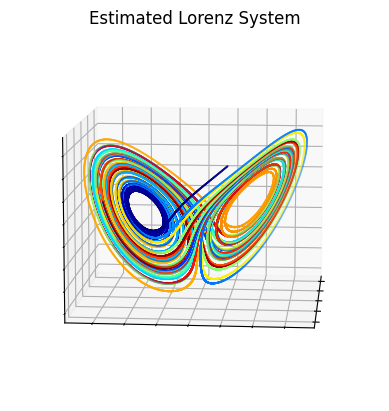

In [27]:
estimated_lorenz = Lorenz(dt=0.0005, t_end=50, f=estimated_f)
estimated_states = estimated_lorenz.run(np.array([1, 1, 1]), t0=0)
ax = estimated_lorenz.plot(estimated_states)
ax.view_init(elev=10., azim=5)
plt.title('Estimated Lorenz System')
plt.show()

## Summary

The above results show that we were able to properly estimate the dynamics of a classic Lorenz attractor. By 'classic', I mean one defined by 3 coefficients sigma, rho, and beta. While the general trajectories look similar they are not exactly the same which makes sense since the Lorenz attractor is chaotic by design. Any small change to the system or initial conditions can have a large impact on the trajectory over time whihc is exacly what we see here. 

According to the ori